Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_entry_time(ns)',
       'update_inode_time(ns)', 'journal_time(ns)',
       'update_page_tail_time(ns)'],
      dtype='object')


IndexError: single positional indexer is out-of-bounds

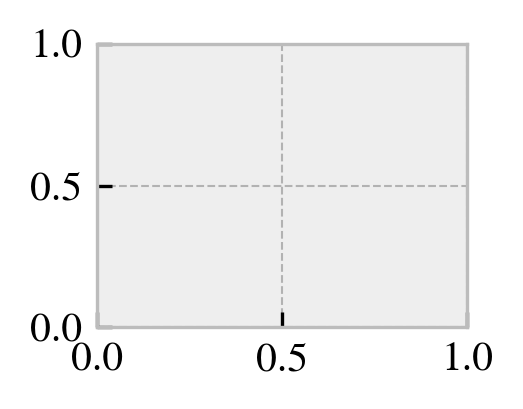

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(7)))
bar_width = 0.5
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) FIO Breakdown (in seconds)", "(b) Copy compiled Linux Breakdown (in seconds)"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["fileserver.f", "varmail.f", "webserver.f", "webproxy.f", "write"]
workloads_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "SW"]

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)"]
bars = []
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = df.columns[14:]
    breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    subfig = plt.subplot(2, 2, fid * len(files) + 1)
    for workload_id, workload in enumerate(workloads):
        left = 0
        pivot = x[workload_id]
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            bar, = plt.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(idx), edgecolor='black', left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            left = left + width 
            if workload_id == 0 and fid == 0:
                bars.append(bar)

    plt.yticks(x, labels=workloads_remap, fontsize=8)
    subfig = plt.subplot(2, 2, fid * len(files) + 2)
    for workload_id, workload in enumerate(workloads):
        left = 0
        pivot = x[workload_id]
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = plt.barh(y=pivot, width=IO, color=plt.get_cmap(cmap)(idx + len(breakdown_times)), edgecolor='black', left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            left = left + width
            if workload_id == 0 and fid == 0:
                bars.append(bar)

    plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
print(len(bars))
legends = ["D-Rd", "D-Wr", "Upd-E", "Upd-I", "Jnl", "Upd-T", "D-IO", "M-IO" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=8, bbox_to_anchor=(0.5, 1.1), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1.5, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-Observation.pdf", bbox_inches='tight', pad_inches=0)


# Two Figures

Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_entry_time(ns)',
       'update_inode_time(ns)', 'journal_time(ns)',
       'update_page_tail_time(ns)'],
      dtype='object')
Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_index_time(ns)',
       'update_inode_time(ns)', 'journal_time(ns)', 'update_dentry_time(ns)'],
      dtype='object')
10


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


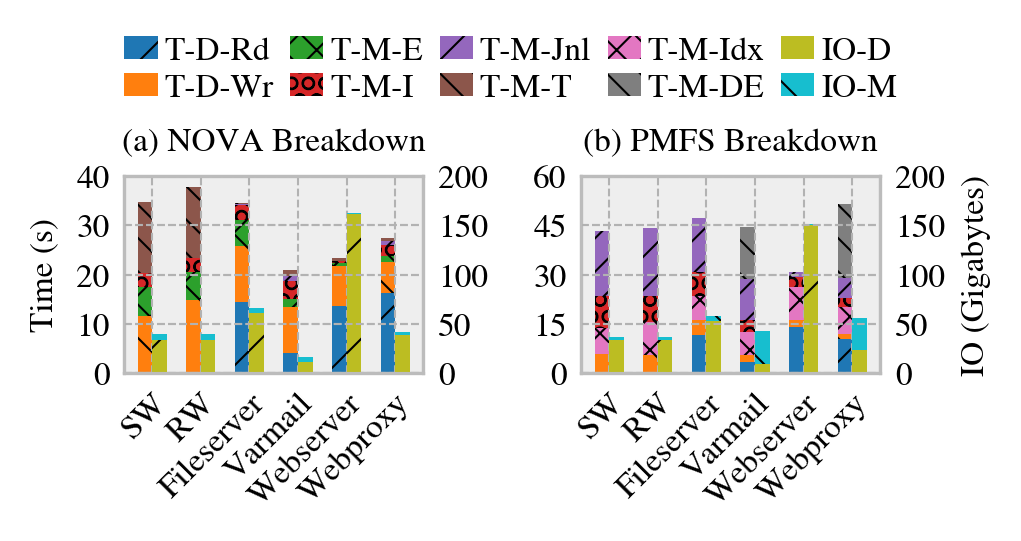

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA Breakdown", "(b) PMFS Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","Fileserver", "Varmail", "Webserver", "Webproxy"]

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = df.columns[14:]
    breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 2, fid + 1)
    ax2 = subfig.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        bottom = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            height = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            
            bar, = subfig.bar(x=pivot, height=height, color=plt.get_cmap(cmap)(global_color_idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            bottom = bottom + height 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    if fid == 0:
        subfig.set_yticks([0, 10, 20, 30, 40])
        subfig.set_yticklabels([0, 10, 20, 30, 40], fontsize=8)
        subfig.set_ylabel("Time (s)", fontsize=8)
    else:
        subfig.set_yticks([0, 15, 30, 45, 60])
        subfig.set_yticklabels([0, 15, 30, 45, 60], fontsize=8)
    
    subfig.set_xticks(x)
    subfig.set_xticklabels(workloads_remap, fontsize=8, rotation=45, ha="right", rotation_mode="anchor")

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        bottom = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.bar(x=pivot, height=IO, color=plt.get_cmap(cmap)(8 + idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            bottom = bottom + IO
            if workload_id == 0 and fid == 1:
                bars.append(bar)
    ax2.set_yticks([0, 50, 100, 150, 200])
    ax2.set_yticklabels([0, 50, 100, 150, 200], fontsize=8)
    if fid == 1:
        ax2.set_ylabel("IO (Gigabytes)", fontsize=8)
    
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)

    plt.title(titles[fid], fontsize=8)


    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-MetaObservation.pdf", bbox_inches='tight', pad_inches=0)


# Amplification

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


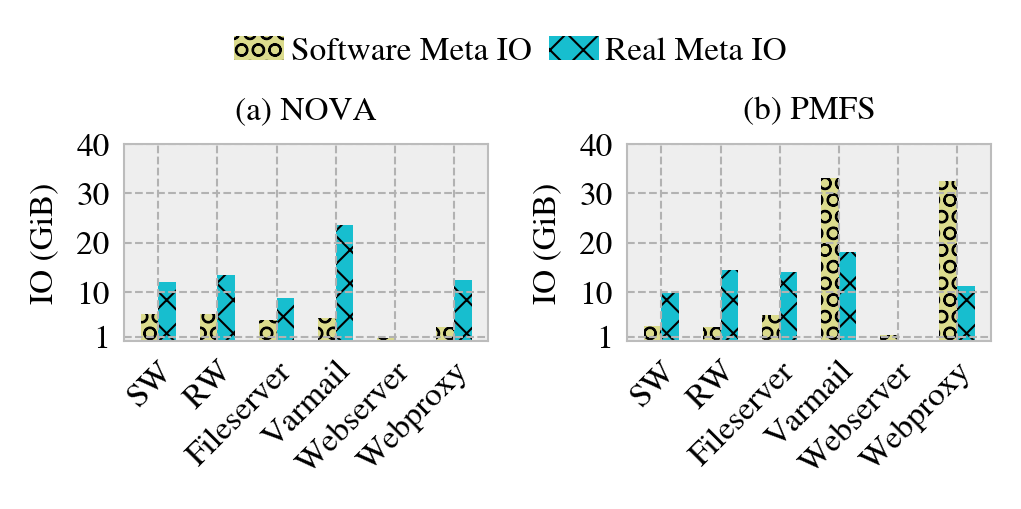

In [78]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.3
inner_width = 0.1
files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
titles = ["(a) NOVA", "(b) PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","Fileserver", "Varmail", "Webserver", "Webproxy"]

x = list(range(1, len(workloads) + 1))
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
for fid, file in enumerate(files):
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')
    
    subfig = plt.subplot(1, 2, fid + 1)
    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    software_meta_ios = []
    real_meta_ios = []
    # amps = []
    for workload_idx, workload in enumerate(workloads):
        data_write = df[df['workloads'] == workload]["data_write(bytes)"].iloc[0]
        data_read = df[df['workloads'] == workload]["data_read(bytes)"].iloc[0]
        media_write = df[df['workloads'] == workload]["media_write(byte)"].iloc[0]
        media_read = df[df['workloads'] == workload]["media_read(byte)"].iloc[0]
        meta_write = df[df['workloads'] == workload]["meta_write(bytes)"].iloc[0]
        meta_read = df[df['workloads'] == workload]["meta_read(bytes)"].iloc[0]

        # write_amp = media_write / (data_write + meta_write)
        # 1 if (media_write - data_write) / meta_write < 1 else (media_write - data_write) / meta_write
        # read_amp = 0 if media_read - media_write - data_read < 0 else media_read - media_write - data_read
        # read_amp = (media_read - media_write) / (data_read + meta_read) 
        # amp = 1 if ((media_read - media_write) + media_write - data_write - data_read) / (meta_read + meta_write) < 1 else ((media_read - media_write) + media_write - data_write - data_read) / (meta_read + meta_write)
        # ((media_read - media_write) + media_write) / (data_read + meta_read + data_write + meta_write)
        # 1 if (media_read - media_write - data_read) / meta_read < 1 else (media_read - media_write - data_read) / meta_read 
        # software_meta_ios.append(write_amp)
        # real_meta_ios.append(read_amp)
        # amps.append(amp)
        software_meta_IO = meta_write + meta_read
        real_meta_IO = 0 if media_write + media_read - media_write - data_write - data_read < 0 else media_write + media_read - media_write - data_write - data_read 
        software_meta_ios.append(software_meta_IO / 1000000000)
        real_meta_ios.append(real_meta_IO / 1000000000)

    subfig.bar([i - bar_width / 2 for i in x], software_meta_ios, width=bar_width, label="Write", color=plt.get_cmap("tab20")(17), hatch=patterns[3])
    subfig.bar([i + bar_width / 2 for i in x], real_meta_ios, width=bar_width, label="Read", color=plt.get_cmap("tab10")(19), hatch=patterns[6])
    # subfig.bar(x, amps, width=bar_width, label="Write", color=plt.get_cmap("tab20")(0), hatch=patterns[fid])
    subfig.set_xticks(x)
    subfig.set_xticklabels(workloads_remap, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)

    subfig.set_yticks([0, 1, 10, 20, 30, 40])
    subfig.set_yticklabels(["", "1", "10", "20", "30", "40"], fontsize=8)
    # subfig.set_yticks([0, 1, 2, 3])
    # subfig.set_yticklabels(["", "1", "2", "3"], fontsize=8)

    subfig.set_title(titles[fid], fontsize=8)
    subfig.set_ylabel("IO (GiB)", fontsize=8)

legend_labels = ["Software Meta IO", "Real Meta IO"]
fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1.5, borderpad=0.2, labelspacing=0.2)
plt.tight_layout()
plt.savefig("./FIG-MetaAmp.pdf", bbox_inches='tight', pad_inches=0)


# KILLER-Study

Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_package_time(ns)',
       'update_bm_time(ns)'],
      dtype='object')
8


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


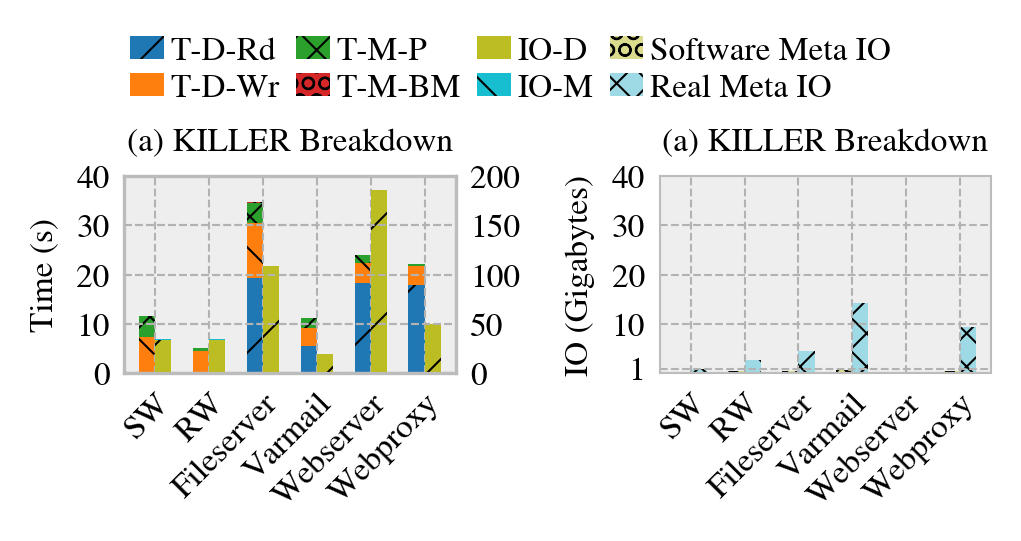

In [80]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) KILLER Breakdown", "(b) PMFS Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","Fileserver", "Varmail", "Webserver", "Webproxy"]

breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = df.columns[14:]
    breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 2, fid + 1)
    ax2 = subfig.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        bottom = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            height = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            
            bar, = subfig.bar(x=pivot, height=height, color=plt.get_cmap(cmap)(global_color_idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            bottom = bottom + height 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    if fid == 0:
        subfig.set_yticks([0, 10, 20, 30, 40])
        subfig.set_yticklabels([0, 10, 20, 30, 40], fontsize=8)
        subfig.set_ylabel("Time (s)", fontsize=8)
    else:
        subfig.set_yticks([0, 15, 30, 45, 60])
        subfig.set_yticklabels([0, 15, 30, 45, 60], fontsize=8)
    
    subfig.set_xticks(x)
    subfig.set_xticklabels(workloads_remap, fontsize=8, rotation=45, ha="right", rotation_mode="anchor")

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        bottom = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.bar(x=pivot, height=IO, color=plt.get_cmap(cmap)(8 + idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            bottom = bottom + IO
            if workload_id == 0:
                bars.append(bar)

    ax2.set_yticks([0, 50, 100, 150, 200])
    ax2.set_yticklabels([0, 50, 100, 150, 200], fontsize=8)
    if fid == 1:
        ax2.set_ylabel("IO (Gigabytes)", fontsize=8)
    
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)

    plt.title(titles[fid], fontsize=8)


    # subfig.title.set_text(titles[fid], fontsize=8)
subfig = plt.subplot(1, 2, 2)

x = list(range(1, len(workloads) + 1))
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
for fid, file in enumerate(files):
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    write_amps = []
    read_amps = []
    amps = []
    for workload_idx, workload in enumerate(workloads):
        data_write = df[df['workloads'] == workload]["data_write(bytes)"].iloc[0]
        data_read = df[df['workloads'] == workload]["data_read(bytes)"].iloc[0]
        media_write = df[df['workloads'] == workload]["media_write(byte)"].iloc[0]
        media_read = df[df['workloads'] == workload]["media_read(byte)"].iloc[0]
        meta_write = df[df['workloads'] == workload]["meta_write(bytes)"].iloc[0]
        meta_read = df[df['workloads'] == workload]["meta_read(bytes)"].iloc[0]
        
        software_meta_IO = meta_write + meta_read 
        real_meta_IO = 0 if media_write + media_read - media_write - data_write - data_read < 0 else media_write + media_read - media_write - data_write - data_read 
        
        write_amps.append(software_meta_IO / 1000000000)
        read_amps.append(real_meta_IO / 1000000000)

    bar = subfig.bar([i - bar_width / 2 for i in x], write_amps, width=bar_width, label="Write", color=plt.get_cmap("tab20")(17), hatch=patterns[3])
    bars.append(bar[0])
    bar = subfig.bar([i + bar_width / 2 for i in x], read_amps, width=bar_width, label="Read", color=plt.get_cmap("tab20")(19), hatch=patterns[6])
    bars.append(bar[0])
    # subfig.bar(x, amps, width=bar_width, label="Write", color=plt.get_cmap("tab20")(0), hatch=patterns[fid])
    subfig.set_xticks(x)
    subfig.set_xticklabels(workloads_remap, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)

    # subfig.set_yticks([0, 4, 8, 12, 16, 20])
    # subfig.set_yticklabels(["", "4", "8", "12", "16", "20"], fontsize=8)
    subfig.set_yticks([0, 1, 10, 20, 30, 40])
    subfig.set_yticklabels(["", "1", "10", "20", "30", "40"], fontsize=8)
    # subfig.set_yticks([0, 1, 2, 3])
    # subfig.set_yticklabels(["", "1", "2", "3"], fontsize=8)

    subfig.set_title(titles[fid], fontsize=8)
    subfig.set_ylabel("IO (Gigabytes)", fontsize=8)

# legend_labels = ["Write Amp", "Read Amp"]
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1.5, borderpad=0.2, labelspacing=0.2)

print(len(bars))
legends = ["T-D-Rd", "T-D-Wr", "T-M-P", "T-M-BM", "IO-D", "IO-M", "Software Meta IO", "Real Meta IO"]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.15), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-KILLERStudy.pdf", bbox_inches='tight', pad_inches=0)
